In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#taking count of unique value in gende column
count_bygender = df ['Gender'].value_counts().to_frame(name = 'count').sort_values(by = ['count'])
count_bygender

,count
Male,88
Female,112


<Axes: xlabel='Gender', ylabel='count'>

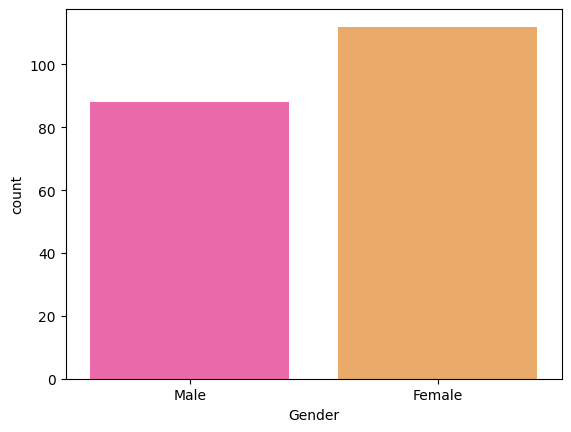

In [8]:
sns.countplot(x = 'Gender', data = df, palette = 'spring')

In [9]:
print('min age in the dataset :',df['Age'].min())
print('max age in the dataset :',df['Age'].max())

min age in the dataset : 18
max age in the dataset : 70


<Figure size 2000x1800 with 0 Axes>

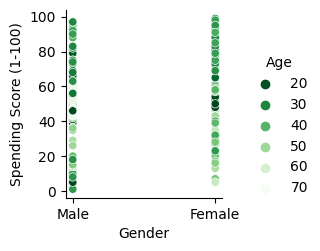

In [10]:
#showing how the variables are scatterd
plt.figure(figsize=(20,18))
sns.pairplot(df,x_vars=['Gender'],y_vars=['Spending Score (1-100)'],kind='scatter',hue='Age',palette='Greens_r')

<Figure size 2000x1800 with 0 Axes>

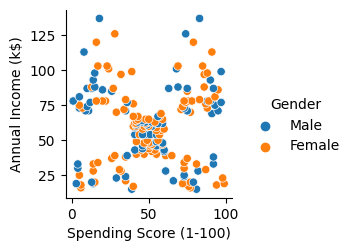

In [11]:
plt.figure(figsize=(20,18))
sns.pairplot(df,x_vars=['Spending Score (1-100)'],y_vars=['Annual Income (k$)'],hue='Gender')

In [12]:
import sys
!{sys.executable} -m pip install pandas-profiling

from pandas_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## K-Means Clustering

In [13]:
from sklearn.cluster import KMeans

x = df[['Annual Income (k$)','Spending Score (1-100)']]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [14]:
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 30)
km.fit_predict(x)

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [15]:
#creating cluster number in the dataset
x['cluster_number'] = km.fit_predict(x)
x

,Annual Income (k$),Spending Score (1-100),cluster_number
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,3
196,126,28,2
197,126,74,3
198,137,18,2


In [16]:
#displaying the data points that fall inside cluster number 1
x[x['cluster_number'] == 1]

,Annual Income (k$),Spending Score (1-100),cluster_number
43,39,61,1
46,40,55,1
47,40,47,1
48,40,42,1
49,40,42,1
...,...,...,...
121,67,40,1
122,69,58,1
126,71,35,1
132,72,34,1


<Axes: xlabel='cluster_number', ylabel='Spending Score (1-100)'>

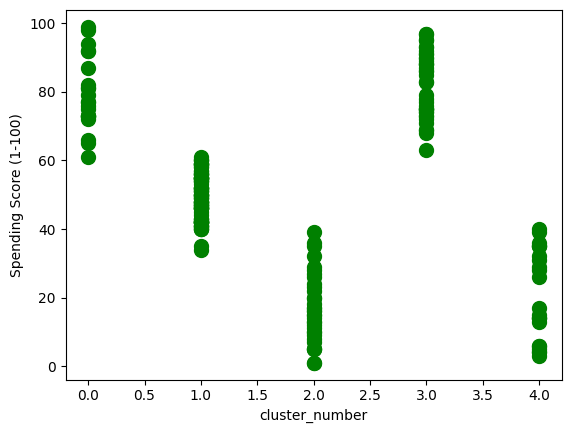

In [17]:
# cluster distribution in  Spending Score (1-100) column
x.plot.scatter(x = 'cluster_number',y='Spending Score (1-100)', s = 100,c='g')

<Axes: xlabel='cluster_number', ylabel='Annual Income (k$)'>

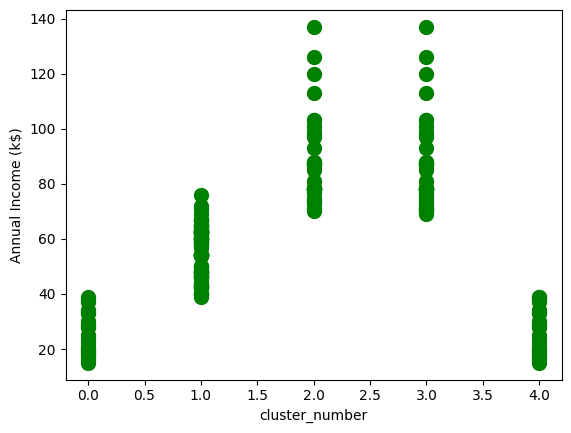

In [18]:
# cluster distribution in  Annual Income (k$) column
x.plot.scatter(y = 'Annual Income (k$)',x='cluster_number', s = 100,c='g')